In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Get_groups import phase_diagram,make_meanr

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
import parmap

In [60]:
seed =10
N = 500
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega)
m = 6
t = np.arange(0,5000,0.1)
K = 4.1
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
new_theta = to_ppi(theta)
dtheta_c = np.cumsum(dtheta,axis=0)
sum_time = 500
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

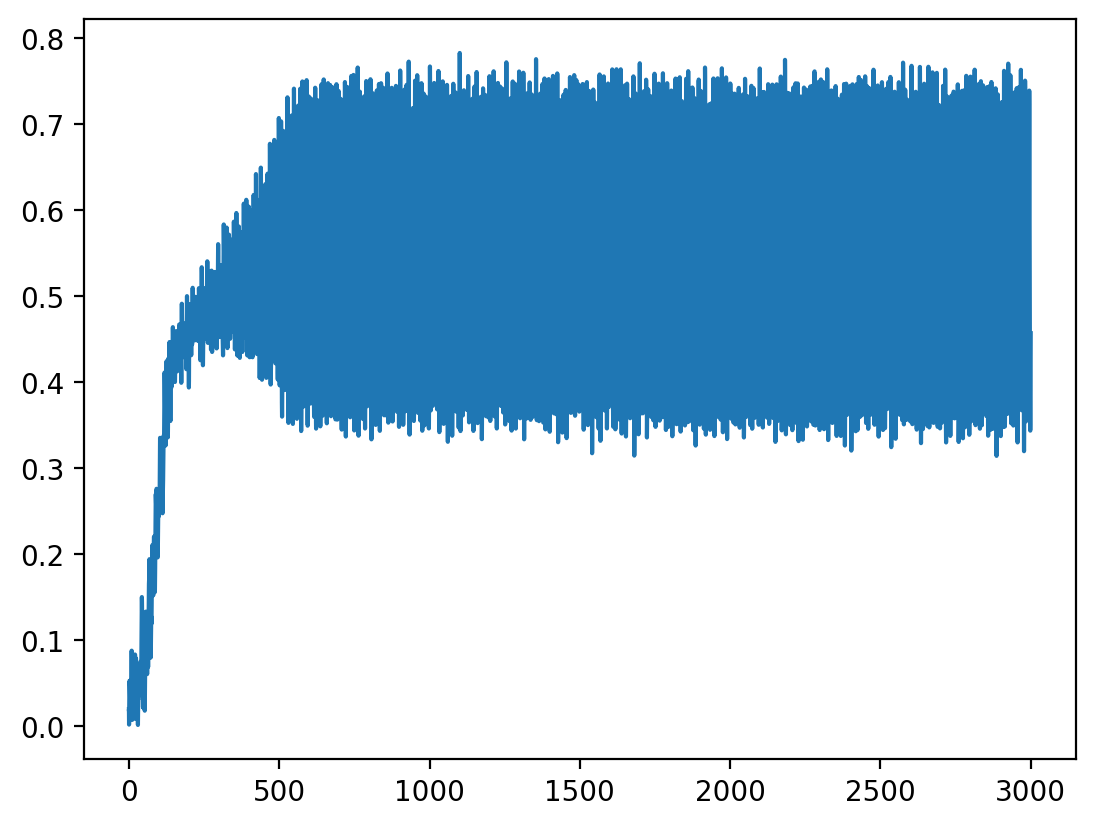

In [52]:
plt.plot(t,rs)

In [53]:
arg = np.argsort(avg_dtheta[-1])

In [54]:
def get_group_index(data_):
    diff_dtheta = np.diff(data_)
    peaks, _ = find_peaks(diff_dtheta, height=0.05)
    diff_peaks = np.diff(peaks)
    temp = np.array([False, *np.where(diff_peaks>5,True,False)])
    New_peaks = peaks[temp]
    New_diff_peaks = [0,*np.diff(New_peaks)]
    idx_max = np.argmax(New_diff_peaks)
    if idx_max == len(New_diff_peaks)-1:
        return np.array([N//2,N//2,N//2,N//2])
    elif len(New_peaks)>4:
        Groups = idx_max + np.array([-2,-1,0,1])
        temp_G = New_peaks[Groups]
        if np.argmax(np.diff(temp_G))!=1:
            Groups = idx_max + np.array([-1,0,1,2])
            temp_G = New_peaks[Groups]
        group_index = temp_G
    elif len(New_peaks)==4:
        group_index = New_peaks
    elif len(New_peaks)>2:
        Groups = idx_max + np.array([-1,0,1])
        temp_G = New_peaks[Groups]
        temp = np.argmax([0,*np.diff(temp_G)])
        A_,B_ = temp_G[temp-1],temp_G[temp]
        group_index = np.array([A_,A_,B_,B_])
    else: 
        group_index = np.array([N//2,N//2,N//2,N//2])
    return group_index

In [7]:
def get_groups(dtheta,sum_time=500):
    dtheta_c = np.cumsum(dtheta,axis=0)
    avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
    num_data = []
    omega_data = []
    for data in avg_dtheta[-500:]:
        diff_dtheta = np.diff(np.sort(data))
        peaks, _ = find_peaks(diff_dtheta, height=0.01)
        num_data.append(np.diff(peaks))
    groups = []
    N = len(dtheta[-1])
    for diff in num_data:
        sort_re = np.sort(diff)[::-1]
        temp = []
        for i in sort_re[:5]:
            temp.append(i)
        if len(sort_re) == 0:
            temp = [N,0,0,0,0]
        else:
            for i in range(5- len(sort_re)):
                temp.append(0)
        groups.append(temp)
    return groups

In [8]:
get_groups(dtheta)

[[236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],
 [236, 107, 56, 15, 10],


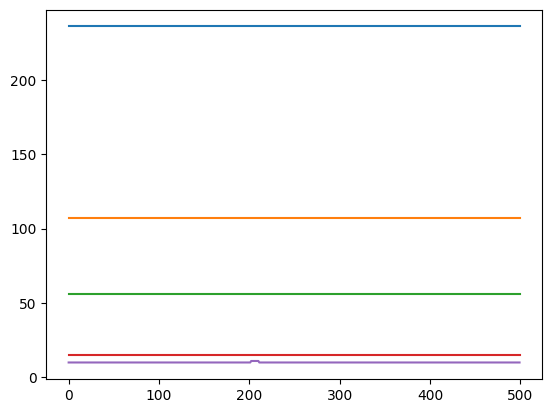

In [9]:
plt.plot(get_groups(dtheta))

In [10]:
groups = []

for i,D in enumerate(avg_dtheta):
    temp = get_group_index(np.sort(D))
    groups.append(temp)

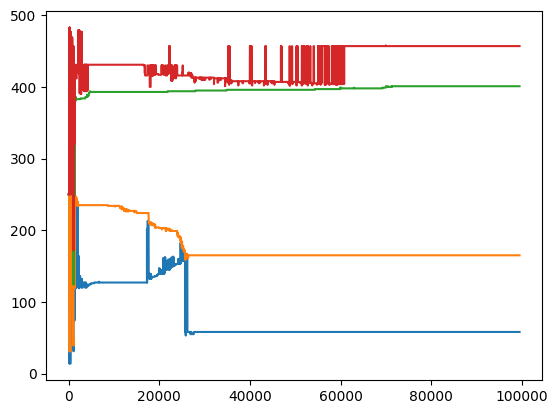

In [11]:
plt.plot(groups)

In [12]:
### 교통 데이터 , pocker plank equation 읽어보기

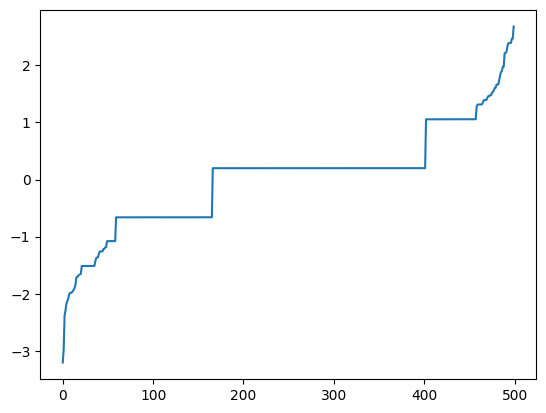

In [13]:
plt.plot(np.sort(avg_dtheta[-1]))

In [14]:
def get_cluster(peaks,num):
    peaks = peaks[np.where((peaks<N)&(peaks>1))]
    peaks_new = [peaks[0],*peaks]
    psize = np.diff(peaks_new)
    arg_psize = np.argsort(psize)[::-1] 
    c_l,c_r = arg_psize[num],arg_psize[num]+1
    cluster = np.array([peaks_new[c_l],peaks_new[c_r]-1])
    size = np.diff(np.array([peaks_new[c_l],peaks_new[c_r]-1]))
    return cluster,size


def near_main(peaks):
    num = 0
    peaks = peaks[np.where((peaks<N)&(peaks>1))]
    peaks_new = [peaks[0],*peaks]
    psize = np.diff(peaks_new)
    arg_psize = np.argsort(psize)[::-1] 
    left_l,left_r = arg_psize[num]-1,arg_psize[num]
    l_cluster = np.array([peaks_new[left_l],peaks_new[left_r]-1])
    
    right_l,right_r = arg_psize[num]+1,arg_psize[num]+2
    r_cluster = np.array([peaks_new[right_l],peaks_new[right_r]-1])
    return l_cluster,r_cluster

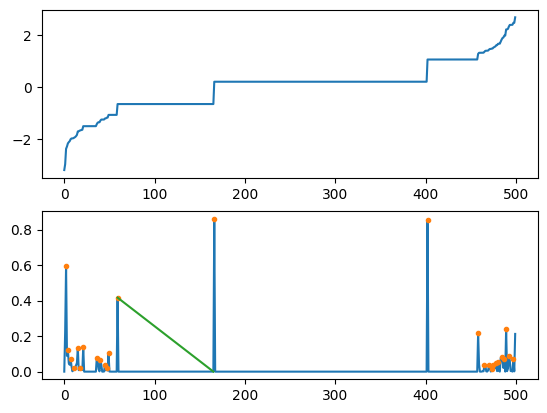

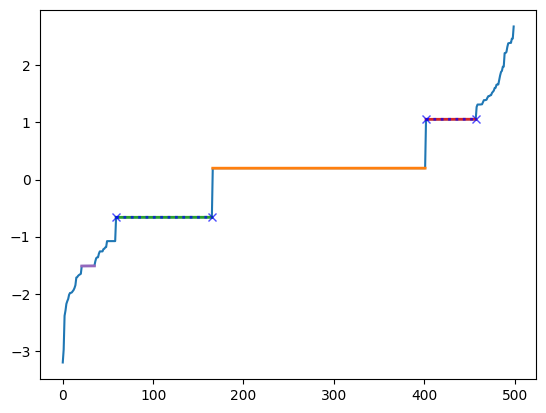

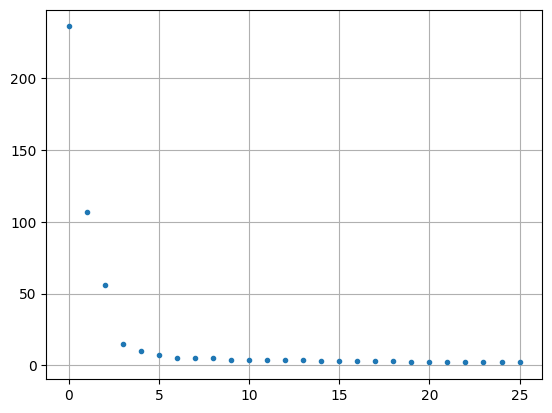

In [15]:
plt.subplot(211)
index = -1
arg = np.argsort(avg_dtheta[index])
SD = avg_dtheta[index][arg]
plt.plot(SD)
# plt.plot(avg_dtheta[1500])

plt.subplot(212)

diff_dtheta = np.diff([SD[0],*SD])

plt.plot(diff_dtheta)
peaks, P  = find_peaks(diff_dtheta, height=0.01)
HP = P['peak_heights']
# peaks = peaks[p_arg]
# peaks = peaks[np.where((peaks<N)&(peaks>1))]

# peaks_new = [peaks[0],*peaks]
# psize = np.diff(peaks_new)
# arg_psize = np.argsort(psize)[::-1] 
C_0,S_0 = get_cluster(peaks,0)
C_1,S_1 = get_cluster(peaks,1)
C_2,S_2 = get_cluster(peaks,2)
C_3,S_3 = get_cluster(peaks,3)
l_c,r_c = near_main(peaks)
max_s = np.sort(diff_dtheta[peaks])[::-1][:2]
# plt.plot(0.01/diff_dtheta)
plt.plot(peaks,diff_dtheta[peaks],'.')
plt.plot(C_1,diff_dtheta[np.array(C_1)])
# plt.yscale('log')

# plt.ylim(0,10)
plt.figure()

SD = avg_dtheta[index][arg]
plt.plot(SD)
plt.plot(np.arange(N)[np.array(C_0)],SD[np.array(C_0)],lw=2,ls='-')
plt.plot(np.arange(N)[np.array(C_1)],SD[np.array(C_1)],lw=2,ls='-')
plt.plot(np.arange(N)[np.array(C_2)],SD[np.array(C_2)],lw=2,ls='-')
plt.plot(np.arange(N)[np.array(C_3)],SD[np.array(C_3)],lw=2,ls='-')
plt.plot(np.arange(N)[l_c],SD[l_c],lw=2,ls=':',color ='blue',alpha=0.7,marker='x')
plt.plot(np.arange(N)[r_c],SD[r_c],lw=2,ls=':',color ='blue',alpha=0.7,marker='x')
plt.figure()
plt.plot(np.sort(np.diff(peaks))[::-1],'.')
# plt.yscale('log')

plt.grid()

In [16]:
print(S_1,S_2,S_3)

[106] [55] [14]


In [17]:
cluster_0 = arg[C_0[0]:C_0[1]]
cluster_1 = arg[C_1[0]:C_1[1]]
cluster_2 = arg[C_2[0]:C_2[1]]

In [18]:
rpsi = 1/N*np.sum(np.exp(1j*theta),axis=1)
r = np.abs(rpsi)
psi = np.angle(rpsi)

In [19]:
import seaborn as sns

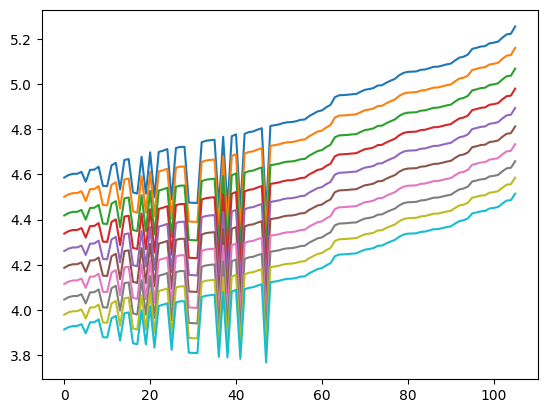

In [20]:
plt.plot((theta[-10:,cluster_1].T-psi[-10:])%(2*np.pi))

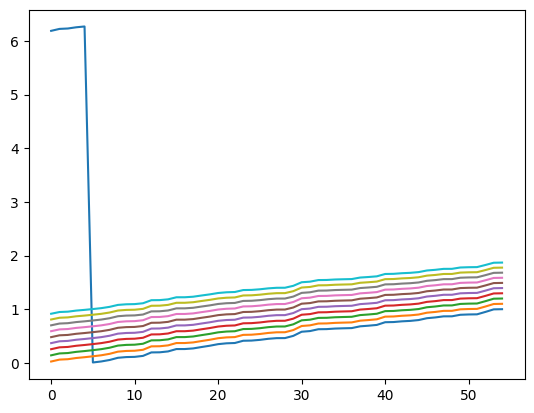

In [21]:
plt.plot(theta[-10:,cluster_2].T%(2*np.pi))

In [22]:
rpsi_c0 = 1/N*np.sum(np.exp(1j*theta[:,cluster_0]),axis=1)
r_c0 = np.abs(rpsi_c0)
psi_c0 = np.angle(rpsi_c0)

<AxesSubplot: ylabel='Density'>

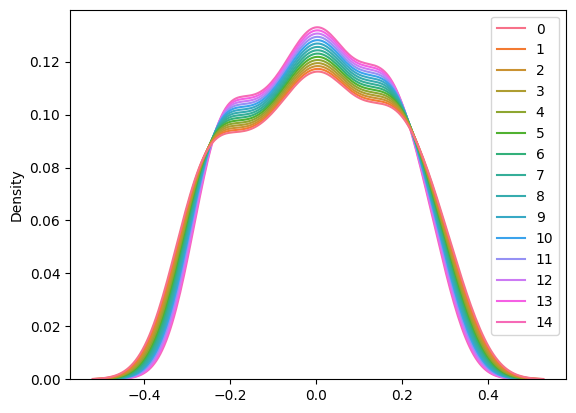

In [23]:
sns.kdeplot((theta[-15::1,cluster_0].T-psi_c0[-15::1]+np.pi)%(2*np.pi)-np.pi)


In [24]:
rpsi_c1 = 1/N*np.sum(np.exp(1j*theta[:,cluster_1]),axis=1)
r_c1 = np.abs(rpsi_c1)
psi_c1 = np.angle(rpsi_c1)

In [25]:
rpsi_c2 = 1/N*np.sum(np.exp(1j*theta[:,cluster_2]),axis=1)
r_c2 = np.abs(rpsi_c2)
psi_c2 = np.angle(rpsi_c2)

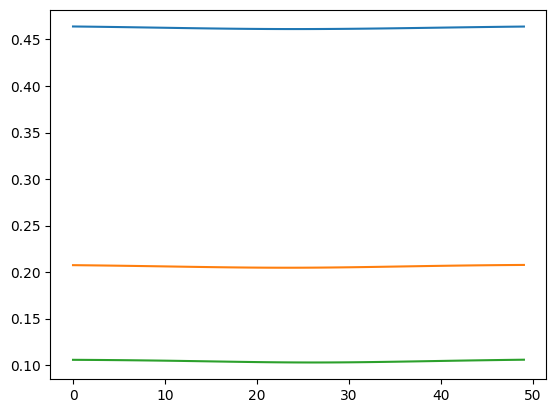

In [26]:
plt.plot(r_c0[-50::1])
plt.plot(r_c1[-50::1])
plt.plot(r_c2[-50::1])

<AxesSubplot: ylabel='Density'>

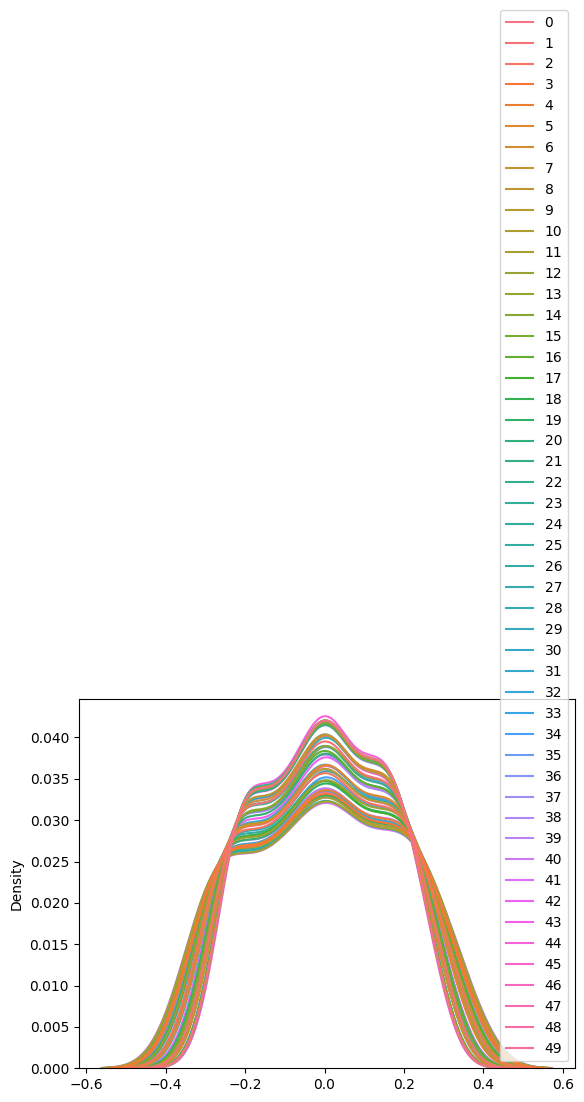

In [27]:
sns.kdeplot((theta[-500::10,cluster_0].T-psi_c0[-500::10]+np.pi)%(2*np.pi)-np.pi)


<AxesSubplot: ylabel='Density'>

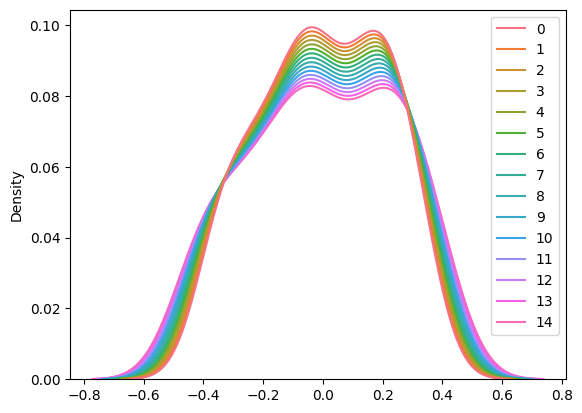

In [28]:
sns.kdeplot((theta[-50:-35:1,cluster_1].T-psi_c1[-50:-35:1]+np.pi)%(2*np.pi)-np.pi)

<AxesSubplot: ylabel='Density'>

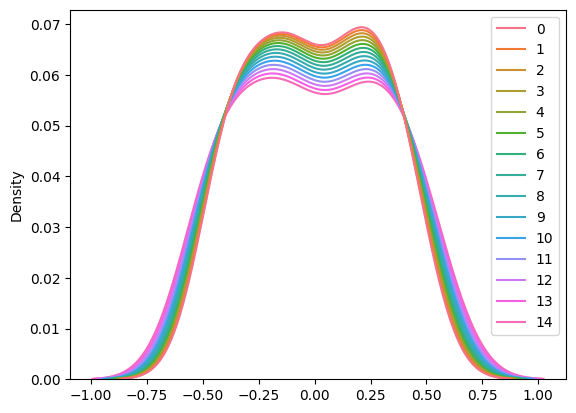

In [29]:
sns.kdeplot((theta[-50:-35:1,cluster_2].T-psi_c2[-50:-35:1]+np.pi)%(2*np.pi)-np.pi)

<AxesSubplot: ylabel='Density'>

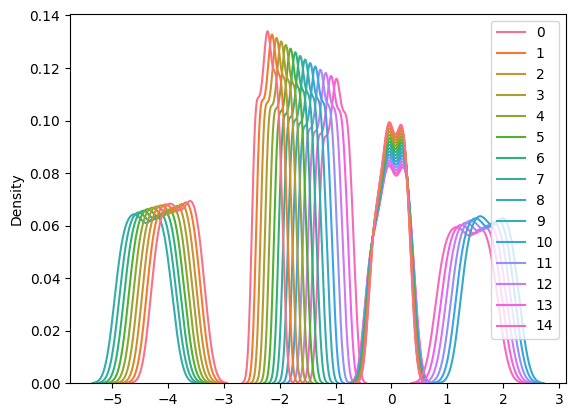

In [30]:
sns.kdeplot((theta[-50:-35:1,cluster_0].T-psi_c0[-50:-35:1]+np.pi)%(2*np.pi)-np.pi - psi_c1[-50:-35:1]+psi_c0[-50:-35:1])
sns.kdeplot((theta[-50:-35:1,cluster_1].T-psi_c1[-50:-35:1]+np.pi)%(2*np.pi)-np.pi)
sns.kdeplot((theta[-50:-35:1,cluster_2].T-psi_c2[-50:-35:1]+np.pi)%(2*np.pi)-np.pi - psi_c2[-50:-35:1]+psi_c0[-50:-35:1])


<AxesSubplot: ylabel='Density'>

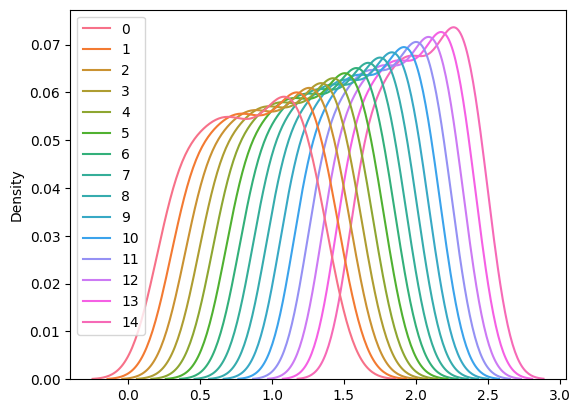

In [31]:
sns.kdeplot((theta[-15::1,cluster_2].T-psi[-15::1]+np.pi)%(2*np.pi)-np.pi)


<AxesSubplot: ylabel='Density'>

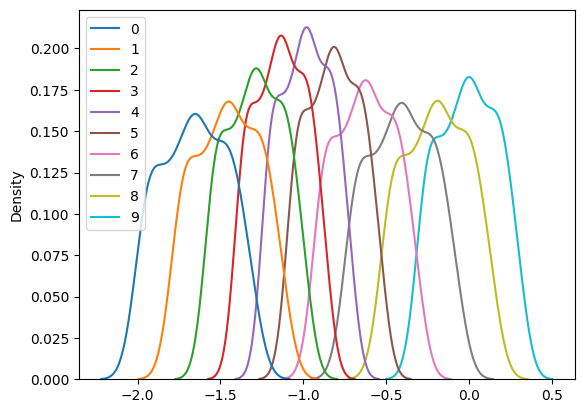

In [33]:
sns.kdeplot((theta[-100::10,cluster_0].T-psi[-10::1]+np.pi)%(2*np.pi)-np.pi)


<AxesSubplot: ylabel='Density'>

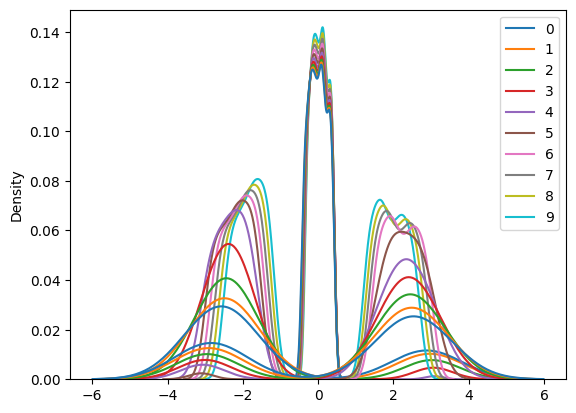

In [108]:

sns.kdeplot((theta[-10::1,cluster_0].T-psi[-10::1]+np.pi)%(2*np.pi)-np.pi)
sns.kdeplot((theta[-10::1,cluster_2].T-psi[-10::1])%(2*np.pi)-np.pi)
sns.kdeplot((theta[-10::1,cluster_1].T-psi[-10::1])%(2*np.pi)-np.pi)


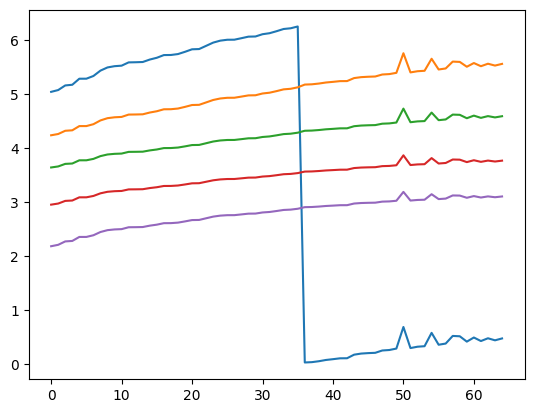

In [59]:
plt.plot((theta[-50::10,cluster_1].T-psi[-50::10])%(2*np.pi))

<AxesSubplot: ylabel='Density'>

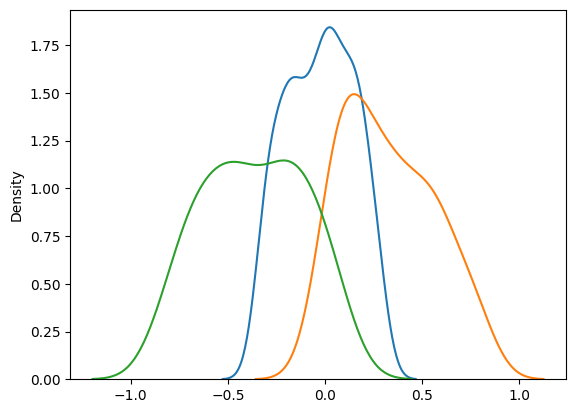

In [69]:
ind = 10
sns.kdeplot(np.sin(theta[-ind,cluster_0].T-psi[-ind]))
sns.kdeplot(np.sin(theta[-ind,cluster_1].T-psi[-ind]))
sns.kdeplot(np.sin(theta[-ind,cluster_2].T-psi[-ind]))


<AxesSubplot: ylabel='Density'>

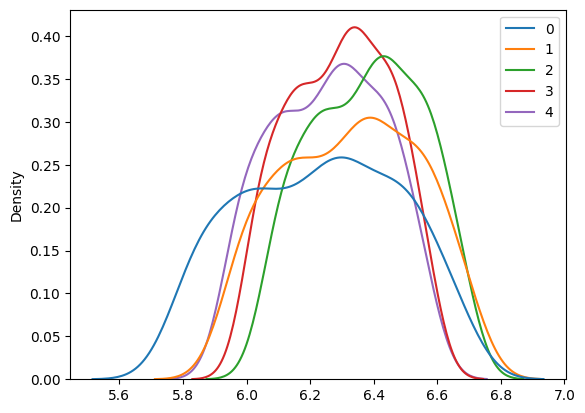

In [58]:
sns.kdeplot((theta[-50::10,cluster_0].T-psi[-50::10]-np.pi)%(2*np.pi)+np.pi)


In [174]:
peaks, P  = find_peaks(diff_dtheta, height=0.01)
HP = P['peak_heights']
p_arg = np.argwhere(HP>0.1).reshape(-1)
peaks = peaks[p_arg]

In [176]:
p_arg

array([ 0,  1,  2,  7, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 25],
      dtype=int64)

In [168]:
peaks

array([[  1],
       [  3],
       [  6],
       [ 21],
       [ 36],
       [ 53],
       [ 58],
       [ 85],
       [142],
       [323],
       [403],
       [417],
       [460],
       [486],
       [496]], dtype=int64)

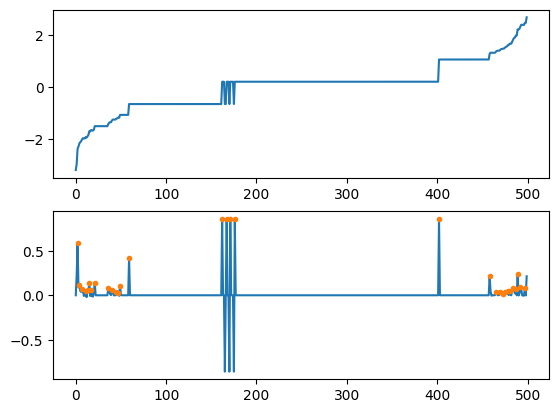

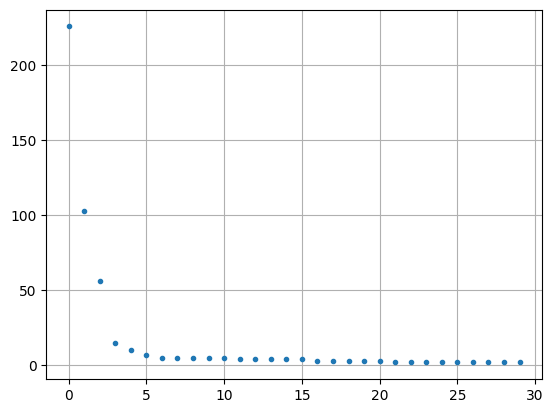

In [34]:
plt.subplot(211)
index = -1
arg = np.argsort(avg_dtheta[index])
SD = avg_dtheta[index]
plt.plot(SD)
# plt.plot(avg_dtheta[1500])

plt.subplot(212)

diff_dtheta = np.diff([SD[0],*SD])

plt.plot(diff_dtheta)
peaks, HP  = find_peaks(diff_dtheta, height=0.01)
peaks_new = [0,*peaks]
peak_size = np.diff(peaks_new)
max_s = np.sort(diff_dtheta[peaks])[::-1][:2]
# plt.plot(0.01/diff_dtheta)
plt.plot(peaks,diff_dtheta[peaks],'.')
# plt.yscale('log')

# plt.ylim(0,10)

plt.figure()
plt.plot(np.sort(np.diff(peaks))[::-1],'.')
# plt.yscale('log')

plt.grid()

In [214]:
peaks[np.sort(np.argsort(HP['peak_heights'][::-1])[:2])]

array([ 3, 28], dtype=int64)

In [215]:
max_s/(2*np.pi)

array([0.12852818, 0.12073086])

In [216]:
print(max_s)

[0.80756639 0.75857438]


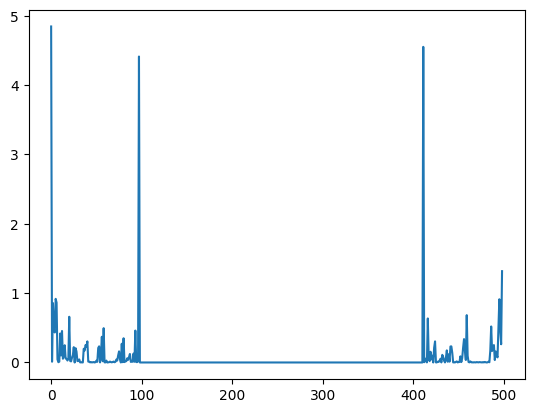

In [217]:
plt.plot(6*np.diff(avg_dtheta[-1,arg]))

In [218]:
peaks1, _ = find_peaks(diff1, height=0.005)
plt.plot(peaks1, diff1[peaks1], "X",label='peaks 1',markersize=6,color='tab:orange')

NameError: name 'diff1' is not defined

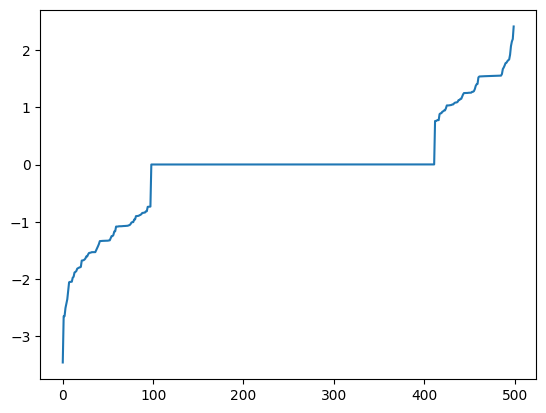

In [219]:
plt.plot(avg_dtheta[-1,arg])

In [38]:
n = len(t)
k = np.arange(n)
Fs = 1/0.1; T = n/Fs
freq = k/T 

In [39]:
def draw_stft(f, t, Zxx):
    plt.figure(figsize=(12,5))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=0.1, shading='gouraud')
    plt.title('STFT Magnitude'); plt.ylabel('Frequency [Hz]')
    plt.grid()
    
    plt.xlabel('Time [sec]'); plt.ylim([0, 0.5]); #plt.show()
    

In [40]:
from scipy import signal

def calc_stft(nperseg,r):
    f, t, Zxx = signal.stft(r, Fs, nperseg=nperseg)
    draw_stft(f, t, Zxx)

In [41]:
max_s/(2*np.pi)

array([0.13685493, 0.13684966])

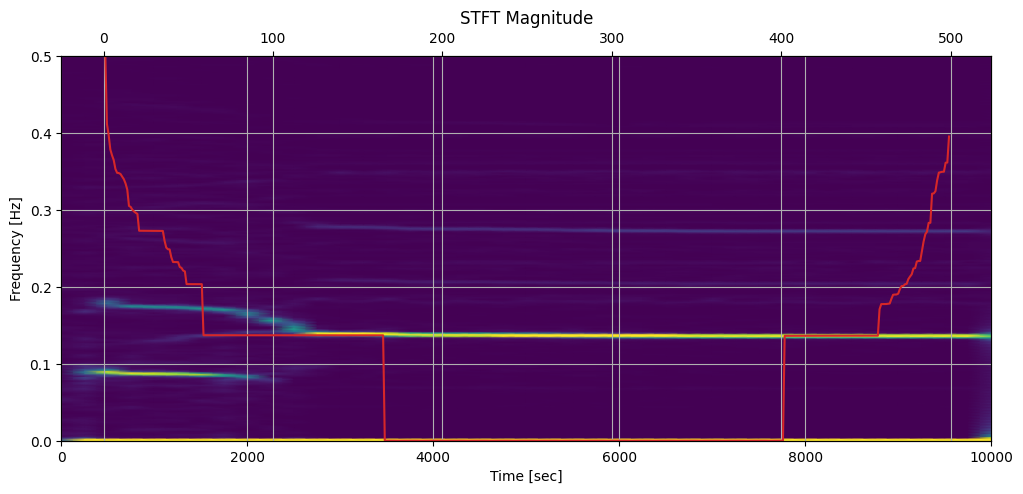

In [42]:
calc_stft(5000,rs)
ax =plt.gca()
ax.twiny()
plt.plot(abs(avg_dtheta[-1,arg]-avg_dtheta[-1][250])/(2*np.pi),color='tab:red')
plt.grid()

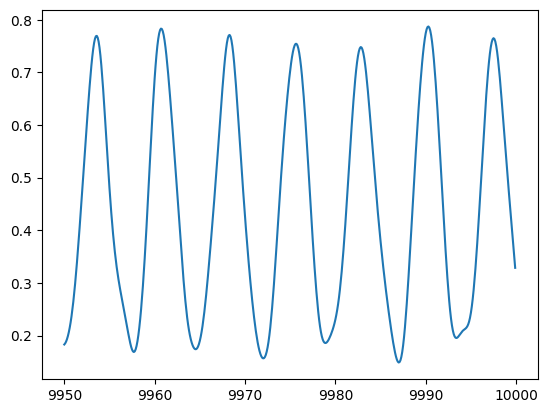

In [43]:
plt.plot(t[-500:],rs[-500:])

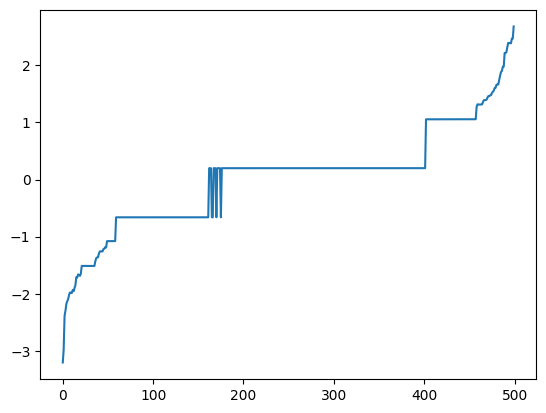

In [44]:
plt.plot(avg_dtheta[-1])

In [45]:
n_dtheta = dtheta / np.max(abs(dtheta))
def time_oscillator_dict(i):
    norm = n_dtheta[i]
    A = (1 - (norm)/2)
    theta_ = theta[i]
    sin,cos = A*np.sin(theta_), A*np.cos(theta_)
    
    return {'x':sin,'y':cos,'c':norm,'cmap':'bwr'}


def time_oscillator(i):
    norm = n_dtheta[i]
    A = (1 - (norm)/2)
    theta_ = theta[i]
    sin,cos = A*np.sin(theta_), A*np.cos(theta_)
    
    return sin,cos,norm,np.sin(theta_),np.cos(theta_)
# plt.plot(1+(n_dtheta));

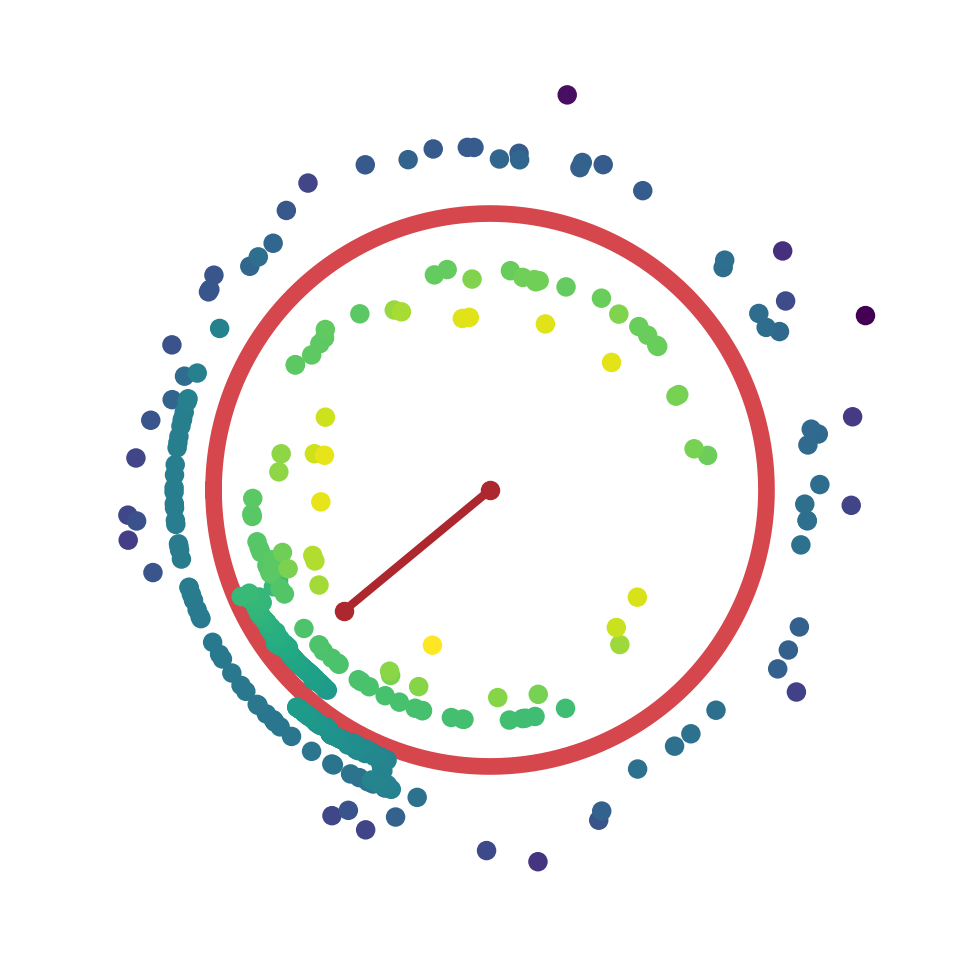

In [55]:
from itertools import combinations,permutations
c_ = np.linspace(-np.pi,np.pi,1000)
circle = {
    'x': np.cos(c_),'y':np.sin(c_)
}

i = 5200
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 5),dpi=100,facecolor=(1,1,1,0))


X,Y,C_,x,y = time_oscillator(i)
ax.plot([0,np.mean(x)],[0,np.mean(y)],color='#AD272E',lw=3,marker='o',zorder=3)
cmap = 'bwr'
s = 100
data = {
    'x': X,'y':Y,
    'c': omega,#'cmap':cmap,
    # 'c': colors,#omega,'cmap':'YlOrRd',
}
cax = ax.scatter(**data,zorder=1)



ax.plot(np.cos(c_),np.sin(c_),zorder=0,color='#D5464D',lw=6)
ax.set_xlim(-1.7,1.7)
ax.set_ylim(-1.7,1.7)
ax.axis('off')
# ax.text(-1.2,1.0,'(4e)',fontsize=18*multi_)
plt.tight_layout()
# ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
# plt.colorbar(cax)
# plt.savefig(f'./DATA_FILE/oscillator_N{N},r_{r[i]}.jpg',dpi=800, transparent=True)

In [56]:
fig.set_facecolor('white')
def ANI(i):
    ax.clear()
    X,Y,C_,x,y = time_oscillator(i)
    ax.plot([0,np.mean(x)],[0,np.mean(y)],color='#AD272E',lw=3,marker='o',zorder=3)
    cmap = 'bwr'
    s = 100
    data = {
        'x': X,'y':Y,
        'c': C_,#'cmap':cmap,
        # 'c': colors,#omega,'cmap':'YlOrRd',
    }
    cax = ax.scatter(**data,zorder=1)



    ax.plot(np.cos(c_),np.sin(c_),zorder=0,color='#D5464D',lw=6)
    ax.set_xlim(-1.7,1.7)
    ax.set_ylim(-1.7,1.7)
    ax.axis('off')
    # ax.text(-1.2,1.0,'(4e)',fontsize=18*multi_)
    plt.tight_layout()
    # ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

In [57]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [59]:
idxs = range(-500,-1,1)
%config InlineBackend.figure_format = 'retina'
ani = FuncAnimation(fig,ANI,frames=idxs,interval=50)
# ani.save('Groups oscillation2.mp4',dpi=400)
# ani.save('Groups oscillation m = 2, K = 2.3.mp4',dpi=400)
HTML(ani.to_html5_video())

<Figure size 640x480 with 0 Axes>

In [132]:
multi_ =1.5

In [133]:
c_dtheta= np.cumsum(dtheta,axis=0)
sum_time = 500
avg_dtheta = (c_dtheta[sum_time:]-c_dtheta[:-sum_time])/sum_time


c_rs= np.cumsum(rs,axis=0)
sum_time = 500
avg_rs = (c_rs[sum_time:]-c_rs[:-sum_time])/sum_time
std_rs = [np.std(rs[i:sum_time+i]) for i in range(len(rs)-sum_time)]
# data = np

Text(0.5, 1.0, '$\\omega_i$')

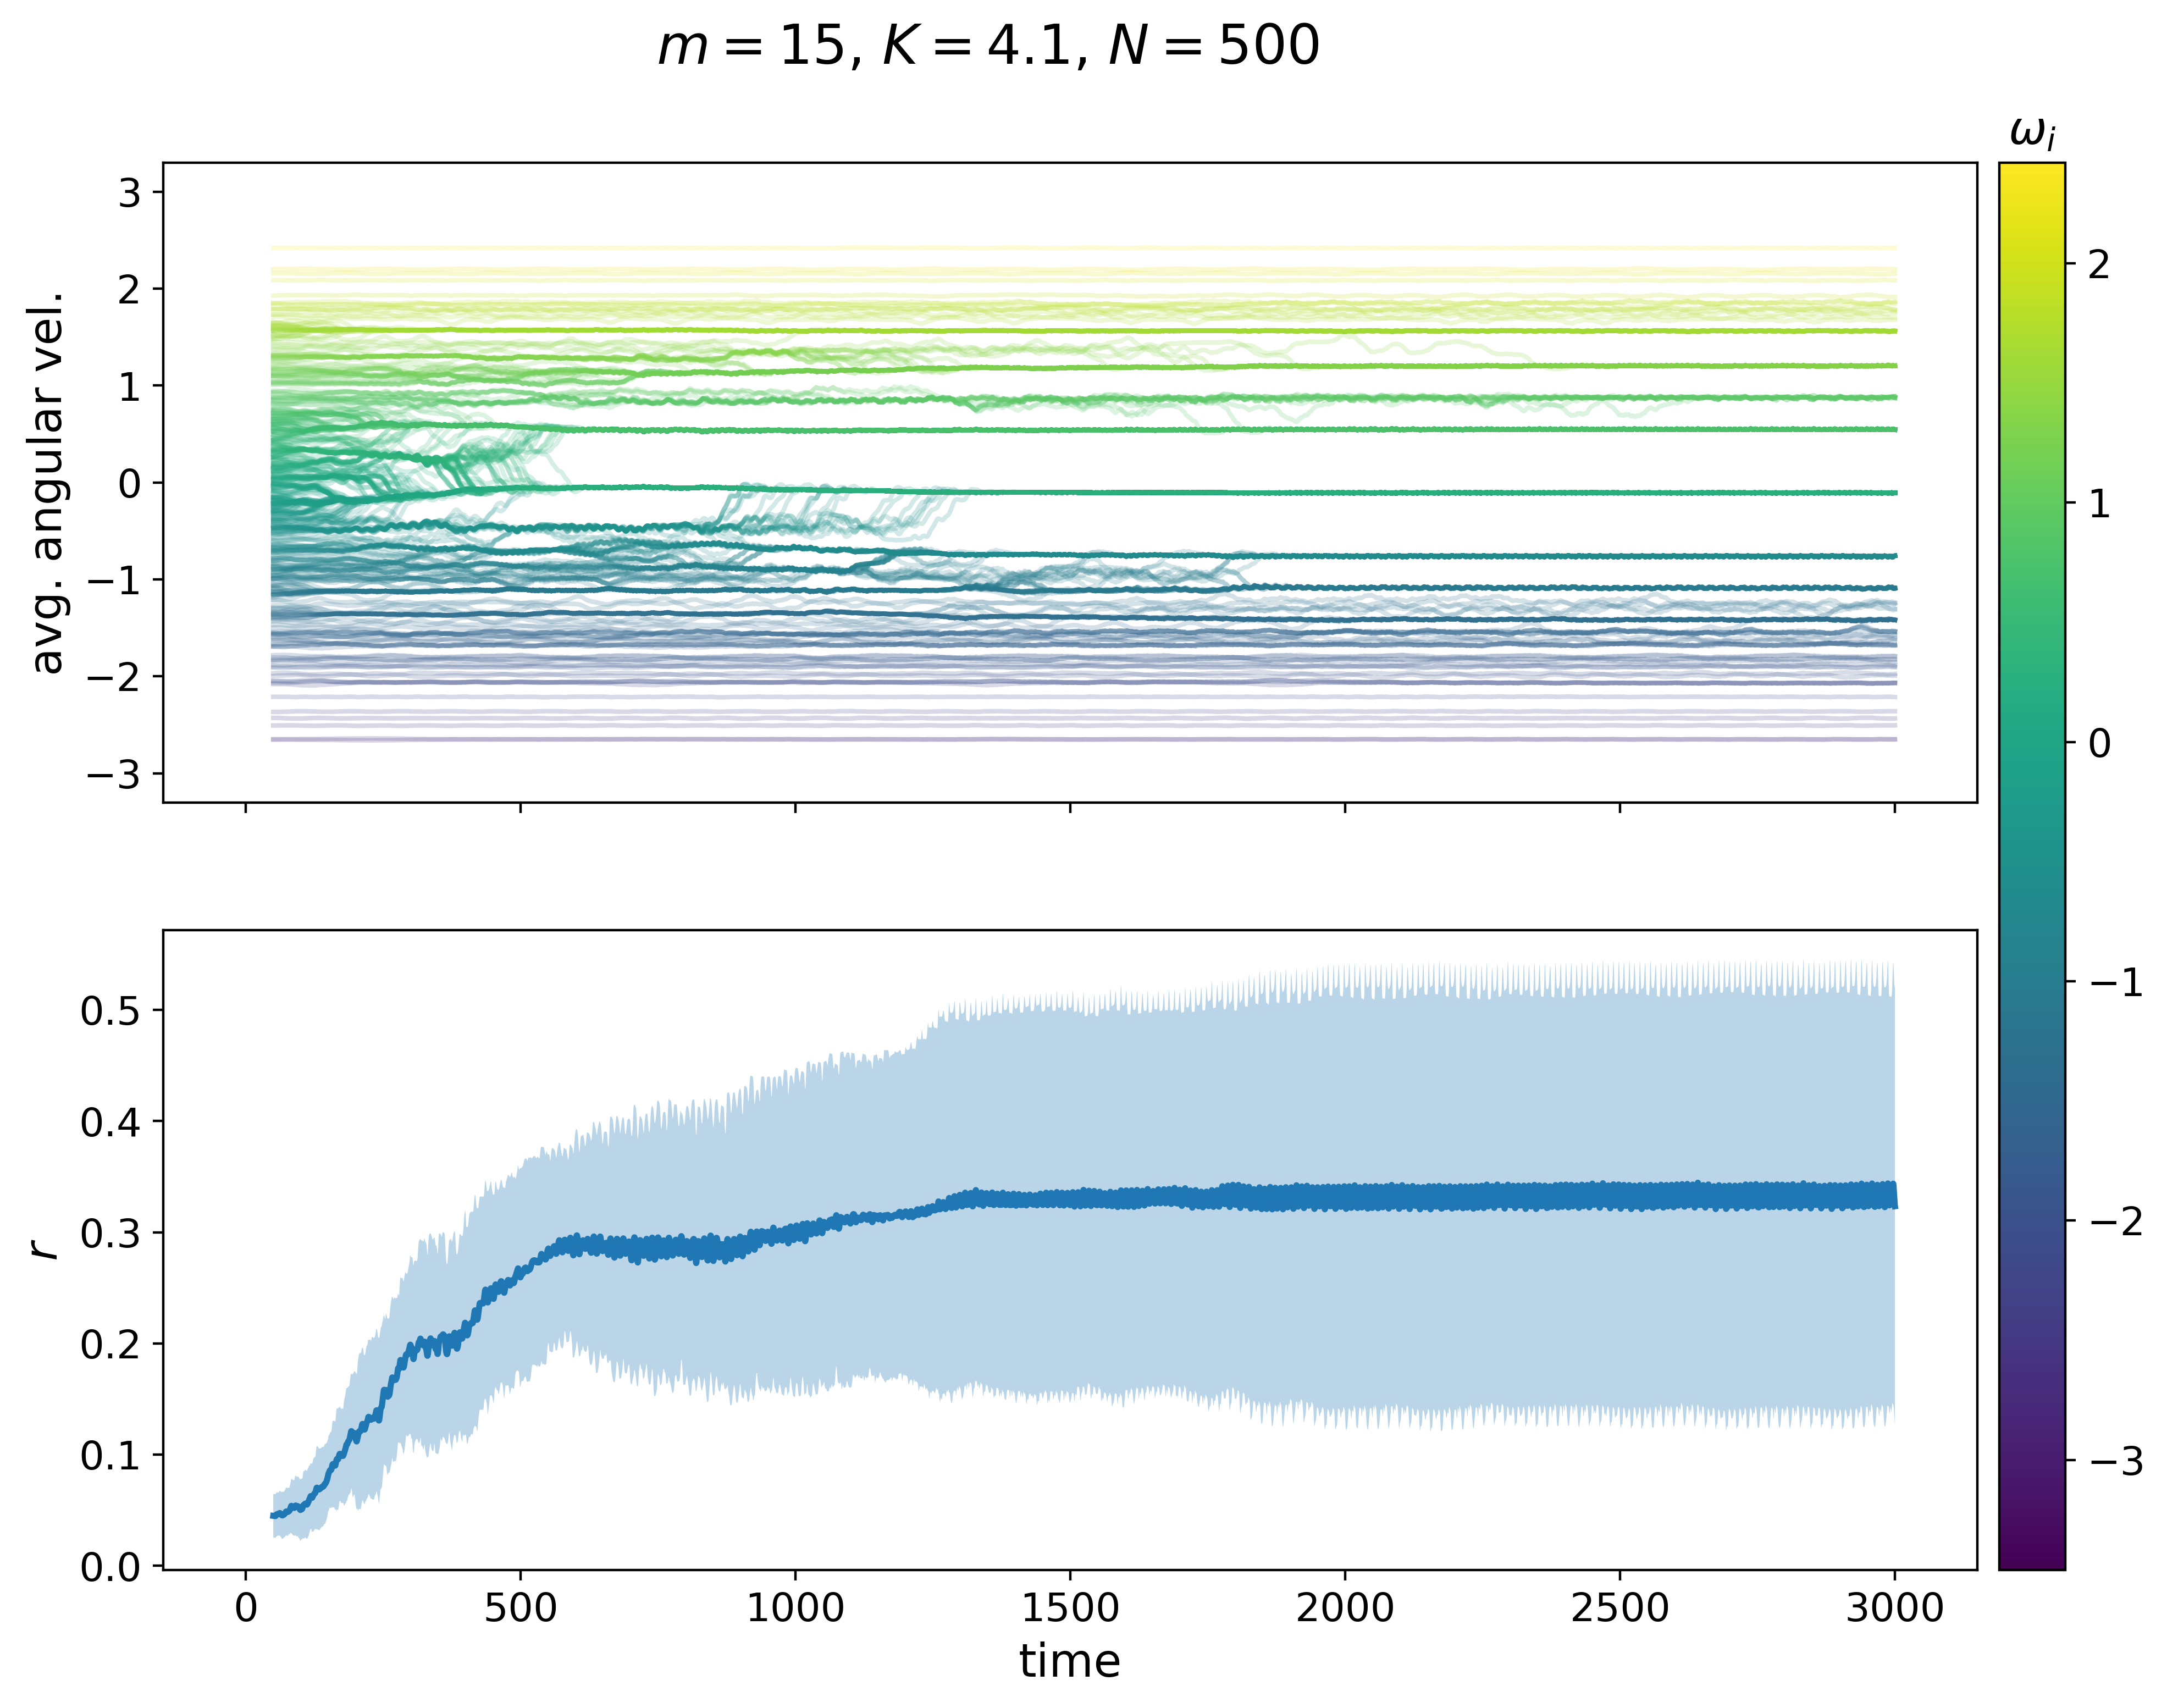

In [158]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8),dpi=400, sharex=True)

plt.sca(ax1)
NORM = lambda x :(x-np.min(x))/(np.max(x)-np.min(x))
color = plt.cm.viridis(NORM(omega))
ln = plt.plot(t[sum_time:],avg_dtheta,alpha=0.2);
sca = plt.scatter(0*omega,0*omega,c=omega,s=0);
for i,l in enumerate(ln):
    l.set_color(color[i])
# plt.vlines(t[sum_time+0],-3.3,3.3,alpha=0.7,color = 'tab:red',lw=3,ls='--')
# plt.vlines(t[sum_time+1450],-3.3,3.3,alpha=0.7,color = 'tab:red',lw=3,ls='--')
# plt.vlines(t[sum_time+5000],-3.3,3.3,alpha=0.7,color = 'tab:red',lw=3,ls='--')
plt.ylim(-3.3,3.3)
ax1.set_ylabel(r'avg. angular vel.',fontsize=10*multi_)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.sca(ax2)
ax2.set_ylabel(r'$r$',fontsize=10*multi_)
plt.xlabel('time',fontsize=15)
plt.plot(t[sum_time:],avg_rs,lw=2);
# plt.errorbar(t[sum_time+0],avg_rs[0],std_rs[0],fmt='.',color ='tab:red',zorder=2,capsize=4,elinewidth=2,capthick=3,ms=10,alpha=0.7)
# plt.errorbar(t[sum_time+1450],avg_rs[1450],std_rs[1450],fmt='.',color ='tab:red',zorder=2,capsize=4,elinewidth=2,capthick=3,ms=10,alpha=0.7)
# plt.errorbar(t[sum_time+5000],avg_rs[5000],std_rs[5000],fmt='.',color ='tab:red',zorder=2,capsize=4,elinewidth=2,capthick=3,ms=10,alpha=0.7)
plt.fill_between(t[sum_time:],avg_rs-std_rs,avg_rs+std_rs,alpha=0.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.suptitle(r'$m=15$, $K=4.1$, $N=500$',fontsize=18)
plt.subplots_adjust(bottom=0.1, right=0.95, top=0.9)

cax = plt.axes([0.96, 0.1, 0.03, 0.8])
cbar = plt.colorbar(sca,cax=cax)
plt.sca(cax)
plt.yticks(fontsize=13)
cax.set_title(r'$\omega_i$',fontsize=10*multi_)
# plt.plot(std_rs)
# plt.tight_layout()